In [707]:
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder , StandardScaler 

In [708]:
cdf = pd.read_csv("")
cdf

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


# Preprocessing

In [709]:
# Cheking the columns with object type
df = cdf
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [710]:
#Removing Car_id column
df = df.drop(['car_ID' , 'CarName'] , axis=1)

In [711]:
object_columns = []

#find the object datas
for col in df.columns:
    if df[col].dtype == 'object':
        object_columns.append(col)

print(object_columns)

['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']


In [712]:
nonobject_columns = []

# find the non object datas
for col in df.columns:
    if df[col].dtype != 'object':
        nonobject_columns.append(col)


print(nonobject_columns)

['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


In [713]:
# Drop rows with missing values
df = df.dropna()
# Remove duplictes
df = df.drop_duplicates()

In [714]:
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col]= le.fit_transform(df[col])
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,1,0,1,0,2,0,88.6,168.8,64.1,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,1,0,1,0,2,0,88.6,168.8,64.1,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,1,0,1,2,2,0,94.5,171.2,65.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,1,0,0,3,1,0,99.8,176.6,66.2,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,1,0,0,3,0,0,99.4,176.6,66.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


In [715]:
nonobject_columns.remove('price')
print(nonobject_columns)

['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']


In [716]:
X = df.drop(['price'], axis=1)
y = df['price']
# Split data to X_train and y_train
X_train, X_test, y_train, y_test = train_test_split(X,y ,test_size = 0.15 ,random_state = 10)


In [717]:
# Create a StandardScaler object
scaler = StandardScaler()
X_train[nonobject_columns]=scaler.fit_transform(X_train[nonobject_columns])
X_test[nonobject_columns] = scaler.transform(X_test[nonobject_columns])

In [718]:
# Create a StandardScaler object
scaler2 = StandardScaler()
X_train[object_columns]=scaler2.fit_transform(X_train[object_columns])
X_test[object_columns] = scaler2.transform(X_test[object_columns])

# Define a model

In [882]:
# Define the neural network model
model = keras.models.Sequential([
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(1)])

# Define a loss function

In [863]:
y_train

90      7099.000
68     28248.000
46     11048.000
167     8449.000
180    15690.000
         ...    
113    16695.000
64     11245.000
15     30760.000
126    32528.000
9      17859.167
Name: price, Length: 173, dtype: float64

#### I assume three thresholds for this function and according to the y_train values i considered values 150000 and 10000 for thresholds and punished the model with using d , d/2 , d*2 in range of these thresholds.

In [883]:
def my_loss2(e1, e2):
    def my_loss(y_true, y_pred):
        d = tf.abs(y_true - y_pred)
        return tf.experimental.numpy.select([d <= e2, d < e1, d >= e1], 
                                        [d ,d/2 , d*2])
    return my_loss
my_loss_2 = my_loss2(15000, 10000) 

In [884]:
model.compile(loss=my_loss_2,
              optimizer="adam",
              metrics=["mean_absolute_error"])
his_cus_loss = model.fit(X_train, y_train, epochs=50,  validation_split=0.15)

Epoch 1/50
5/5 [==============================] - 1s 48ms/step - loss: 18372.2812 - mean_absolute_error: 12992.7031 - val_loss: 24101.8223 - val_mean_absolute_error: 15677.1660
Epoch 2/50
5/5 [==============================] - 0s 9ms/step - loss: 18371.6035 - mean_absolute_error: 12992.1758 - val_loss: 24100.9297 - val_mean_absolute_error: 15676.5400
Epoch 3/50
5/5 [==============================] - 0s 9ms/step - loss: 18370.7891 - mean_absolute_error: 12991.5371 - val_loss: 24099.8301 - val_mean_absolute_error: 15675.7676
Epoch 4/50
5/5 [==============================] - 0s 9ms/step - loss: 18369.7500 - mean_absolute_error: 12990.7354 - val_loss: 24098.4023 - val_mean_absolute_error: 15674.7725
Epoch 5/50
5/5 [==============================] - 0s 9ms/step - loss: 18368.4844 - mean_absolute_error: 12989.7080 - val_loss: 24096.4922 - val_mean_absolute_error: 15673.4492
Epoch 6/50
5/5 [==============================] - 0s 9ms/step - loss: 18366.5469 - mean_absolute_error: 12988.2588 - va

## Training with mae loss

In [844]:
model = keras.models.Sequential([
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(1)])

In [845]:
model.compile(loss="mean_absolute_error",
              optimizer="adam",
              metrics=["mean_absolute_error"])
his_mae_loss = model.fit(X_train, y_train, epochs=50,  validation_split=0.15)

Epoch 1/50
5/5 [==============================] - 1s 44ms/step - loss: 12992.9170 - mean_absolute_error: 12992.9170 - val_loss: 15677.4229 - val_mean_absolute_error: 15677.4229
Epoch 2/50
5/5 [==============================] - 0s 9ms/step - loss: 12992.2285 - mean_absolute_error: 12992.2285 - val_loss: 15676.7549 - val_mean_absolute_error: 15676.7549
Epoch 3/50
5/5 [==============================] - 0s 9ms/step - loss: 12991.4844 - mean_absolute_error: 12991.4844 - val_loss: 15675.9600 - val_mean_absolute_error: 15675.9600
Epoch 4/50
5/5 [==============================] - 0s 9ms/step - loss: 12990.5947 - mean_absolute_error: 12990.5947 - val_loss: 15674.9395 - val_mean_absolute_error: 15674.9395
Epoch 5/50
5/5 [==============================] - 0s 9ms/step - loss: 12989.4033 - mean_absolute_error: 12989.4033 - val_loss: 15673.5674 - val_mean_absolute_error: 15673.5674
Epoch 6/50
5/5 [==============================] - 0s 9ms/step - loss: 12987.8125 - mean_absolute_error: 12987.8125 - va

## Training with mse loss

In [885]:
model = keras.models.Sequential([
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(1)])

In [886]:
model.compile(loss="mean_squared_error",
              optimizer="adam",
              metrics=["mean_absolute_error"])
his_mse_loss = model.fit(X_train, y_train, epochs=50,  validation_split=0.15)

Epoch 1/50
5/5 [==============================] - 2s 44ms/step - loss: 229442656.0000 - mean_absolute_error: 12993.2529 - val_loss: 343366144.0000 - val_mean_absolute_error: 15677.9883
Epoch 2/50
5/5 [==============================] - 0s 8ms/step - loss: 229432640.0000 - mean_absolute_error: 12992.8857 - val_loss: 343354720.0000 - val_mean_absolute_error: 15677.6465
Epoch 3/50
5/5 [==============================] - 0s 9ms/step - loss: 229422160.0000 - mean_absolute_error: 12992.4902 - val_loss: 343341440.0000 - val_mean_absolute_error: 15677.2500
Epoch 4/50
5/5 [==============================] - 0s 9ms/step - loss: 229410144.0000 - mean_absolute_error: 12992.0342 - val_loss: 343324480.0000 - val_mean_absolute_error: 15676.7617
Epoch 5/50
5/5 [==============================] - 0s 9ms/step - loss: 229395184.0000 - mean_absolute_error: 12991.4814 - val_loss: 343302880.0000 - val_mean_absolute_error: 15676.1494
Epoch 6/50
5/5 [==============================] - 0s 9ms/step - loss: 229374848

## Comparision of three losses

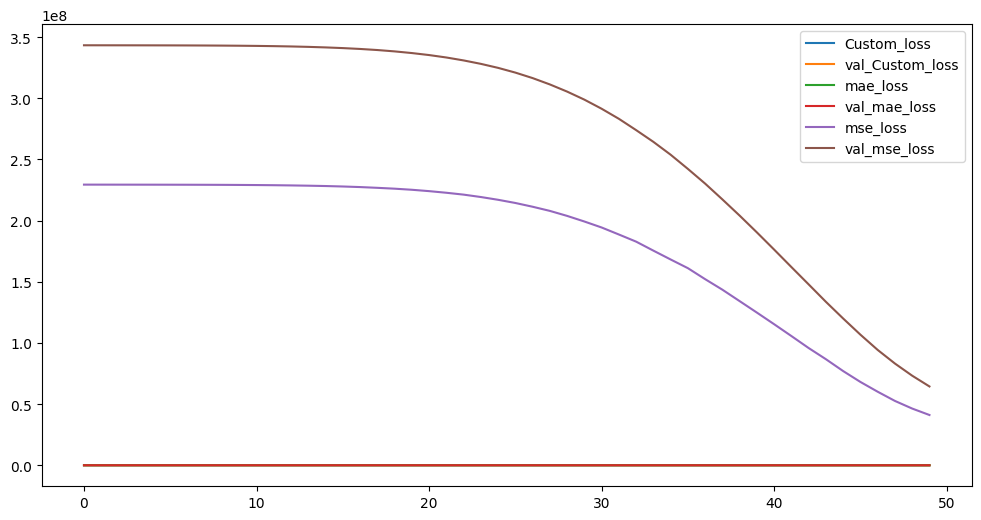

In [888]:
# Create x-axis values for epochs
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(his_cus_loss.history['loss'], label='Custom_loss')
ax.plot(his_cus_loss.history['val_loss'], label='val_Custom_loss')
ax.plot(his_mae_loss.history['loss'], label='mae_loss')
ax.plot(his_mae_loss.history['val_loss'], label='val_mae_loss')
ax.plot(his_mse_loss.history['loss'], label='mse_loss')
ax.plot(his_mse_loss.history['val_loss'], label='val_mse_loss')

ax.legend()